In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import scipy
from scipy.stats import skew
from scipy.stats import kurtosis
import pylab as p
import statsmodels.api as sm


In [3]:
df=pd.read_csv('advertising.csv')

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
rows,columns= df.shape
print(f'There are {rows} rows and {columns} columns in advertising sample dataset')

There are 200 rows and 4 columns in advertising sample dataset


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
print("skewness")
print("TV")
print(round(skew(df.TV, axis=0, bias=True),4))
print("Radio")
print(round(skew(df.Radio, axis=0, bias=True), 4))
print("Newspaper")
print(round(skew(df.Newspaper, axis=0, bias=True),4))
print("Sales")
print(round(skew(df.Sales, axis=0, bias=True),4))

skewness
TV
-0.0693
Radio
0.0935
Newspaper
0.888
Sales
-0.0732


In [13]:
print("Kurtosis")
print("TV")
print(round(kurtosis(df.TV, axis=0, bias=True),4))
print("Radio")
print(round(kurtosis(df.Radio, axis=0, bias=True), 4))
print("Newspaper")
print(round(kurtosis(df.Newspaper, axis=0, bias=True),4))
print("Sales")
print(round(kurtosis(df.Sales, axis=0, bias=True),4))

Kurtosis
TV
-1.2259
Radio
-1.259
Newspaper
0.6035
Sales
-0.654


In [14]:
df.isnull().sum()*100/df.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

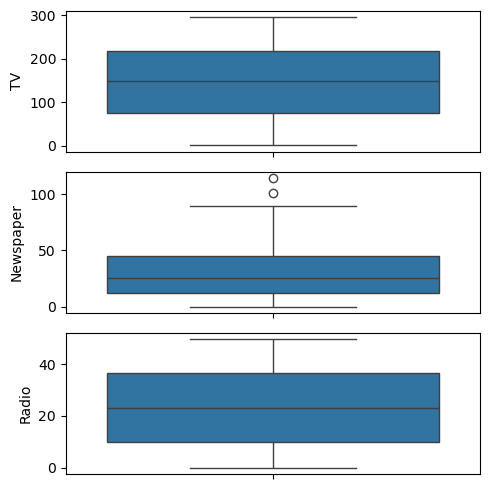

In [17]:
fig, axs = plt.subplots (3, figsize =(5,5))
plt1=sns.boxplot(df['TV'], ax=axs[0])
plt2=sns.boxplot(df [ 'Newspaper'], ax=axs[1])
plt3=sns.boxplot(df['Radio'], ax=axs [2])
plt.tight_layout()

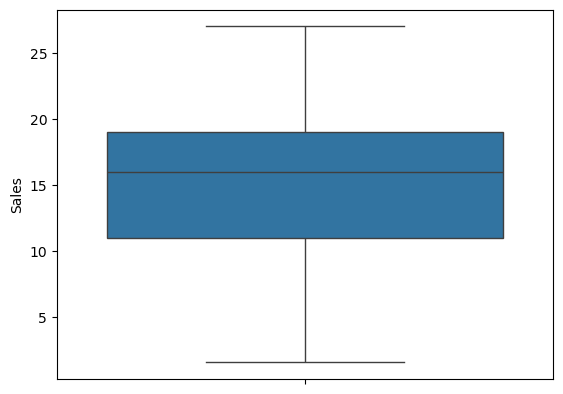

In [18]:
sns.boxplot(df['Sales'])
plt.show()

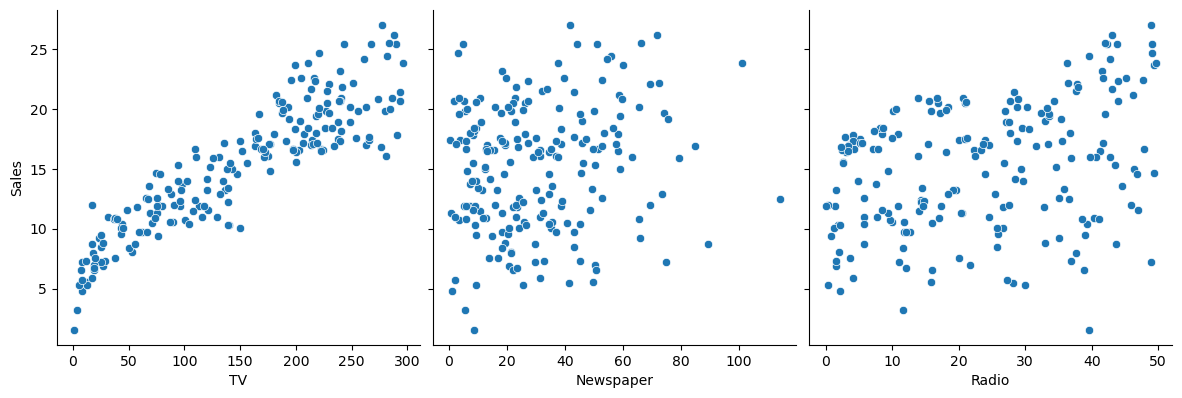

In [19]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

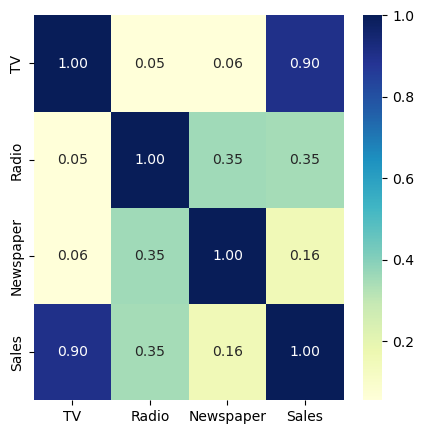

In [23]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, fmt=".2f")
plt.show()


In [25]:
x=df['TV']
y=df['Sales']

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.7, test_size=0.3, random_state=100
)


In [29]:
x_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [30]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [31]:
x_train_sm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_sm).fit()

In [32]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [33]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 19 Jan 2026   Prob (F-statistic):           1.52e-52
Time:                        11:38:42   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

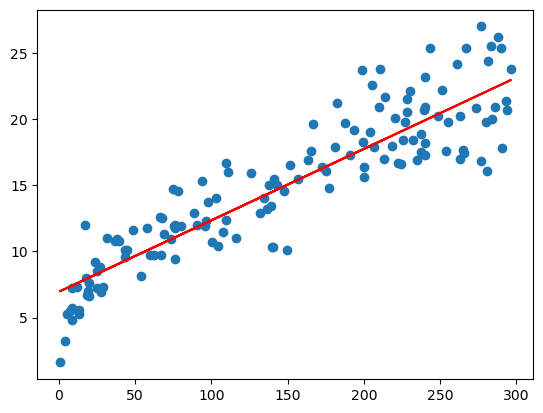

In [34]:
plt.scatter(x_train,y_train)
plt.plot(x_train,6.948+0.054*x_train,'r')
plt.show()